In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x198e32a0518>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x198e32a0b70>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [11]:
inspector = inspect(engine)
# Get a list of column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [39]:
#session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

In [29]:
print(session.query(Station).statement)

SELECT station.id, station.station, station.name, station.latitude, station.longitude, station.elevation 
FROM station


In [37]:
#session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

In [15]:
#dates = session.query(Measurement)
#for date in dates:
#    print(date.date)

# Exploratory Precipitation Analysis

In [16]:
import datetime as dt

In [17]:
# Starting from the most recent data point in the database. 

most_recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(f"The most recent date is {most_recent_date.date}.")

The most recent date is 2017-08-23.


In [18]:
# Calculate the date one year from the last date in data set

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"The date one year from the last date in data set is {year_ago}.")

The date one year from the last date in data set is 2016-08-23.


In [88]:
# Perform a query to retrieve the date and precipitation scores

last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

In [89]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(last_12_months[:], columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True,)

# Sort the dataframe by date
df.sort_values(by=['Date'], ascending=True)
df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


<function matplotlib.pyplot.show(*args, **kw)>

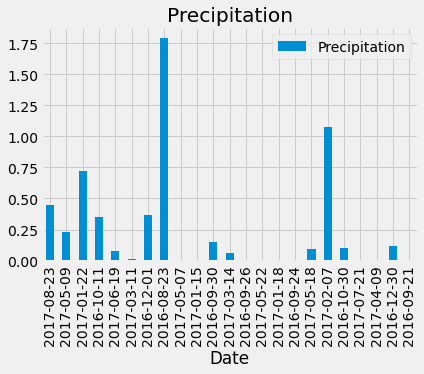

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

#df.plot(kind='bar', title='Precipitation') 
df.iloc[::-100].plot.bar(title="Precipitation")

plt.show

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data



In [56]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
# 1. using the Station data
no_of_stations = session.query(Station.name).count()
print(f"There are {no_of_stations} stations in the dataset.")

There are 9 stations in the dataset.


In [47]:
# 2. Using the Measurment data
station_count = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {station_count} stations in the dataset.")

There are 9 stations in the dataset.


In [75]:
# List the stations
stations = session.query(Station)
for x in stations:
    print(x.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [79]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(Measurement.station.desc()).all()
    

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.)

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_most_active = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == 'USC00513117')\
        .filter(Measurement.date >= year_ago).all()

df = pd.DataFrame(last_12_months_most_active[:], columns=['Date', 'Temperature'])
df.set_index('Date', inplace=True,)
df

,Temperature
Date,
2016-08-23,76.0
2016-08-24,76.0
2016-08-25,77.0
2016-08-26,78.0
2016-08-27,73.0
...,...
2017-07-27,77.0
2017-07-28,77.0
2017-07-29,78.0


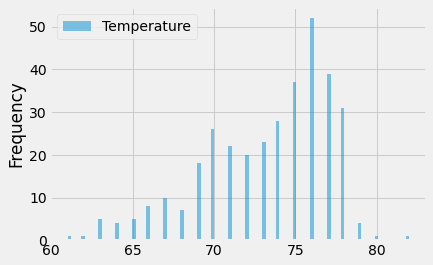

In [93]:
ax = df.plot.hist(bins=100, alpha=0.5)

# Close session

In [ ]:
# Close Session
session.close()